## 타이타닉 데이터 실습 

In [1]:
# 타이타닉 데이터 실습 ......성별, 요금, 선착장, 
#scikit-learn 에서 제공하는 머신러닝 알고리즘에 데이터를 넣을 수 있는 기본 조건

#모든 데이터는 숫자(정수형, 소수점 등)로 구성되어 있어야 한다.
#데이터에 빈 값이 없어야 한다.
#여기서는 타이타닉 데이터에 있는 세 컬럼(Sex, Fare, Embarked)을 전처리하는 과정

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("titanic/train.csv")
x = df.drop("Survived", axis=1)
y = df["Survived"]
model = DecisionTreeClassifier()
model.fit(x, y)

### Encode Sex

- 우리는 male(남성)과 female(여성)이 어떤 것을 뜻하는지 알고 있다. 
- Decision Tree는 내부에서 수학과 통계학으로 돌아가는 알고리즘이므로 male과 female의 의미를 알지 못한다. 
- 성별(Sex) 컬럼을 Decision Tree가 이해할 수 있는 방식으로 바꿔줘야 할 필요가 있다.
- [scikit-learn](scikit-learn.org)의 머신러닝 알고리즘에 데이터를 넣을 수 있는 기본 조건 
> 모든 데이터는 숫자로 구성되어 있어야 한다. (성별 컬럼을 숫자로 바꿔주어야함)
> 성별 컬럼을 전처리하는 가장 쉬운 방법은 male은 0으로, female은 1로 바꿔주는 것입니다. 

In [1]:
import pandas as pd
import numpy as np


In [7]:
# titanic_train.csv 
train = pd.read_csv("titanic/train.csv", index_col="PassengerId")
train.loc[1:3, ["Sex","Fare", "Embarked"]]

,Sex,Fare,Embarked
PassengerId,,,
1,male,7.2500,S
2,female,71.2833,C
3,female,7.9250,S


In [9]:
train.loc[train["Sex"] == "male", "Sex"]

PassengerId
1      male
5      male
6      male
7      male
8      male
       ... 
884    male
885    male
887    male
890    male
891    male
Name: Sex, Length: 577, dtype: object

In [10]:
# 성별(Sex) 값이 male인 경우 0으로, female인 경우 1로 수정
# 단 Sex 컬럼을 바로 수정하지 않고, Sex_encode라는 새로운 컬럼을 추가해서 넣는다.
# 전처리를 할 때는  원본을 유지하고 사본에다가 작업해주는게 좋다. 
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

print(train.shape)

train[["Sex", "Sex_encode"]].head()

(891, 12)


,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [12]:
# titanic_train.csv 파일을 읽어온 방식과 동일하게 titanic_test를 읽기 
test = pd.read_csv("titanic/test.csv", index_col="PassengerId")

print(test.shape)
test.head(2)

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [13]:
# train 데이터의 성별(Sex) 컬럼을 전처리해준 방식과 동일하게 test 데이터도 전처리
# Sex_encode 컬럼에 male이면 0을, female을 1을 대입
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1

print(test.shape)
test[["Sex", "Sex_encode"]].head(2)

(418, 11)


,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0


## Fare 칼럼 결측치

- [scikit-learn](scikit-learn.org)의 머신러닝 알고리즘에 데이터를 넣을 땐 언제나 데이터에 값이 채워져 있어야 합니다. 만일 데이터에 **NaN**(Not a Number)이라는 값이 있다면 이는 비어있다는 의미이며, 이 데이터를 머신러닝 알고리즘에 넣으면 에러가 발생합니다.

- 타이타닉 데이터에 운임요금(Fare) 컬럼을 살펴보면, train 데이터에는 빈 값이 없지만 test 데이터에는 딱 하나 빈 값이 있다는 것을 확인할 수 있습니다. (1044번 승객, Storey, Mr. Thomas) 그러므로 운임요금(Fare) 컬럼을 DecisionTree에 넣기 위해서는 1044번 승객의 운임요금 값을 다른 값으로 채워줘야 합니다.

In [14]:
# train 데이터에서 운임요금(Fare)이 비어있는 승객을 검색합니다. 검색 결과 아무런 값도 나오지 않습니다.
# 즉, train 데이터에는 운임요금(Fare)이 비어있는 승객이 한 명도 없다는 것으로 이해할 수 있습니다.
train[train["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,


In [15]:
# test 데이터에서 운임요금(Fare)이 비어있는 승객을 검색합니다.
# 1044번 승객(Storey, Mr. Thomas)의 운임요금(Fare) 값 : (NaN) 
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


- 운임요금(Fare)이 비어있는 값을 채우는 가장 일반적인 방법은 
>train 데이터의 운임요금(Fare)의 평균(mean) 넣기.
>하지만 전체 test 데이터중에 단 하나의 값만 비어있기 때문에, 평균이 아닌 적당한 값을 넣어도 될듯
>그러므로 편리하게 test 데이터의 빈 운임요금(Fare) 값은 0으로 채운다. 

In [16]:
# 앞서 성별(Sex) 컬럼을 전처리한 것과 마찬가지로,
# 원본(Fare)을 고치지 않고 사본(Fare_fillin)을 만들어 그 곳에 빈 값 넣기 
train["Fare_fillin"] = train["Fare"]

print(train.shape)
train[["Fare", "Fare_fillin"]].head()

(891, 13)


,Fare,Fare_fillin
PassengerId,,
1,7.2500,7.2500
2,71.2833,71.2833
3,7.9250,7.9250
4,53.1000,53.1000
5,8.0500,8.0500


In [19]:
# train 데이터를 다룬 것과 비슷한 방식으로 test 데이터도 사본을 만든다 
test["Fare_fillin"] = test["Fare"]

print(test.shape)
test[["Fare", "Fare_fillin"]].head()

(418, 12)


,Fare,Fare_fillin
PassengerId,,
892,7.8292,7.8292
893,7.0000,7.0000
894,9.6875,9.6875
895,8.6625,8.6625
896,12.2875,12.2875


In [18]:
test.loc[1044,]

Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
Sex_encode                      0
Fare_fillin                     0
Name: 1044, dtype: object

In [20]:
# test 데이터에서 운임요금(Fare) 값이 비어있는 승객을 검색한 뒤, 해당 승객의 운임요금(Fare_fillin) 값을 0.
test.loc[test["Fare"].isnull(), "Fare_fillin"] = 0
test.loc[test["Fare"].isnull(), ["Fare", "Fare_fillin"]]

,Fare,Fare_fillin
PassengerId,,
1044,NaN,0.0


In [24]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Encode Embarked(선착장) 전처리

- **C**, **S**, **Q**가 어떤 의미인지 : 수학과 통계학으로 돌아가는 Decision Tree가 이해못함. 
- Decision Tree에 데이터를 넣기 위해서는 모든 데이터가 숫자로 구성되어 있어야 한다.  

  * C == 0
  * S == 1
  * Q == 2
  
- 이런 방식으로 선착장을 인코딩 할 경우, Decision Tree는 다음과 같은 오해를 할수있다. 
>"어 S가 1이고 Q가 2라면, 그럼 2 * S == Q 인가? 내지는 S + S == Q 인가?"
> C, S, Q를 숫자로 변환해주되, 
> 세 값에 특정 연산(덧셈, 뺄셈, 곱셈, 나눗셈 등)을 하지 않도록 인코딩 필요 . 
> 이 방식을 [원 핫 인코딩(One Hot Encoding)](https://minjejeon.github.io/learningstock/2017/06/05/easy-one-hot-encoding.html)이라고 한다. 
> 원 핫 인코딩을 통해 선착장(Embarked)을 인코딩 

  * C == [1, 0, 0]
  * S == [0, 1, 0]
  * Q == [0, 0, 1]

- 파이썬에서는 매우 간단한 방법으로 One Hot Encoding을 할 수 있다. 
프로그래밍 언어에서 True는 1로, False는 0으로 간주한다. (즉, True == 1, False == 0 입니다) 
선착장(Embarked)을 One Hot Encoding 할 수 있다.

  * C == [True, False, False]
  * S == [False, True, False]
  * Q == [False, False, True]



In [25]:
# 먼저 Embarked 컬럼이 C이면 True, C가 아니면 False인 색인 코드를 작성
# 그리고 여기서 나온 결과를 그대로 Embarked_C 라는 새로운 컬럼에 대입
# 이제 Embarked_C 컬럼은 승객이 C(Cherbourg)에서 탑승했으면 True, 그렇지 않으면 False

#  C(셰르부르) , S(사우샘프턴 )와 Q(퀸스타운)
train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"   
train["Embarked_Q"] = train["Embarked"] == "Q"
print(train.shape)

train[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(891, 16)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False


In [26]:
test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"
print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]].head()

(418, 15)


,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False


In [27]:
#Embarked 칼럼에 결축치가 있다. 
train.loc[train["Embarked"].isnull(), : ]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1.0,80.0,False,False,False
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1.0,80.0,False,False,False


In [28]:
############다음은 참고 
pd.unique(train["Embarked"]).tolist()

['S', 'C', 'Q', nan]

In [29]:
from sklearn.preprocessing import LabelEncoder
items = pd.unique(train["Embarked"]).tolist()
encoder = LabelEncoder()
encoder.fit(items)
print(encoder.classes_)
labels = encoder.transform(items)
labels

['C' 'Q' 'S' 'nan']


array([2, 0, 1, 3], dtype=int64)

In [30]:
from sklearn.preprocessing import OneHotEncoder

labels = labels.reshape(-1,1)
print(labels)
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
oh_labels.toarray()

[[2]
 [0]
 [1]
 [3]]


array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

## Train

- 타겟 변수(Target Variable) : label(레이블),  타이타닉 경진대회에서는 생존 여부(Survived)
- Feature :우리가 label을 맞추는데 도움이 되는 값들,타이타닉 데이터에서는 label을 제외한 대부분의 값들이 Feature
  > 1) 티켓 등급(Pclass) <br>
  > 2) 성별(Sex_encode) <br>
  > 3) 운임요금(Fare_fillin)<br> 
  > 4) 선착장(Embarked)<br>


In [36]:
train[train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1.0,80.0,False,False,False
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1.0,80.0,False,False,False


In [40]:
train.loc[train.Embarked.isnull(), ["Embarked", "Embarked_C", "Embarked_S", "Embarked_Q"]]

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
62,NaN,False,False,False
830,NaN,False,False,False


In [42]:
df = pd.get_dummies(train.Embarked)
df.loc[[62,18,17,2]]

,C,Q,S
PassengerId,,,
62,0,0,0
18,0,0,1
17,0,1,0
2,1,0,0


In [43]:
# 선착장(Embarked)은 one hot encoding하였기 때문에, Embarked 자체 컬럼이 아닌 Embarked_C, Embarked_S, Embarked_Q 세 개의 컬럼을 사용
feature_names = ["Pclass", "Sex_encode", "Fare_fillin",
                 "Embarked_C", "Embarked_S", "Embarked_Q"]
feature_names

['Pclass',
 'Sex_encode',
 'Fare_fillin',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q']

In [44]:
# 생존 여부(Survived)를 label로 지정
label_name = "Survived"

In [45]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(891, 6)


,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
1,3,0.0,7.2500,False,True,False
2,1,1.0,71.2833,True,False,False
3,3,1.0,7.9250,False,True,False
4,1,1.0,53.1000,False,True,False
5,3,0.0,8.0500,False,True,False


In [46]:
# feature_names를 활용해 test 데이터의 feature를 가져옵니다.
# 이를 X_test라는 이름의 변수에 할당합니다.
X_test = test[feature_names]

# X_test 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(X_test.shape)

# X_test 데이터의 상위 5개를 띄웁니다.
X_test.head()

(418, 6)


,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,,,
892,3,0.0,7.8292,False,False,True
893,3,1.0,7.0000,False,True,False
894,2,0.0,9.6875,False,False,True
895,3,0.0,8.6625,False,True,False
896,3,1.0,12.2875,False,True,False


In [47]:
# label_name을 활용해 train 데이터의 label을 가져옵니다.
# 이를 y_train이라는 이름의 변수에 할당합니다.
y_train = train[label_name]

# y_train 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(y_train.shape)

# y_train 데이터의 상위 5개를 띄웁니다.
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

### Use Decision Tree

X_train, X_test, y_train 데이터를 만들었으면, 이제 이 데이터를 활용하여 Decision Tree를 학습시켜 보겠습니다.

파이썬(Python) 프로그래밍 언어에서 인공지능&머신러닝에 관련된 기능을 가장 많이 보유하고 있는 건 [scikit-learn](scikit-learn.org) 입니다. scikit-learn에 있는 머신러닝 알고리즘에는 크게 두 가지 기능이 있습니다.


  * **fit**: 머신러닝 알고리즘을 학습시킵니다. 전문용어로 fitting한다고 하기 때문에 fit이라는 표현을 사용합니다. fit을 하기 위해서는 train 데이터가 필요하며, 정확히는 train 데이터의 feature(X_train)와 label(y_train)이 필요합니다.
  * **predict**: **fit**이 끝나면, 이후에 **predict**를 통해 예측을 할 수 있습니다. predict를 하기 위해서는 test 데이터가 필요하며, 정확히는 test 데이터의 feature(X_test)가 필요합니다.

이 두 가지 기능만 숙지하고 있으면 언제 어디서든 머신러닝 알고리즘을 활용할 수 있습니다.

In [48]:
# scikit-learn(줄여서 sklearn)의 tree 모듈에서 DecisionTreeClassifier를 가져옵니다.
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier를 생성하는데, 트리의 최대 깊이(depth)를 5로 설정합니다.
# 이렇게 하면 트리의 가지(branch)가 5 depth 아래로 내려가지 않습니다.
# 또한 생성한 DecisionTreeClassifier를 model이라는 이름의 변수에 할당합니다.
model = DecisionTreeClassifier(max_depth=5)
# DecisionTreeClassifier를 학습합니다.
# 학습에는 fit 이라는 기능을 사용하며, train 데이터의 feature(X_train)와 label(y_train)을 집어넣습니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

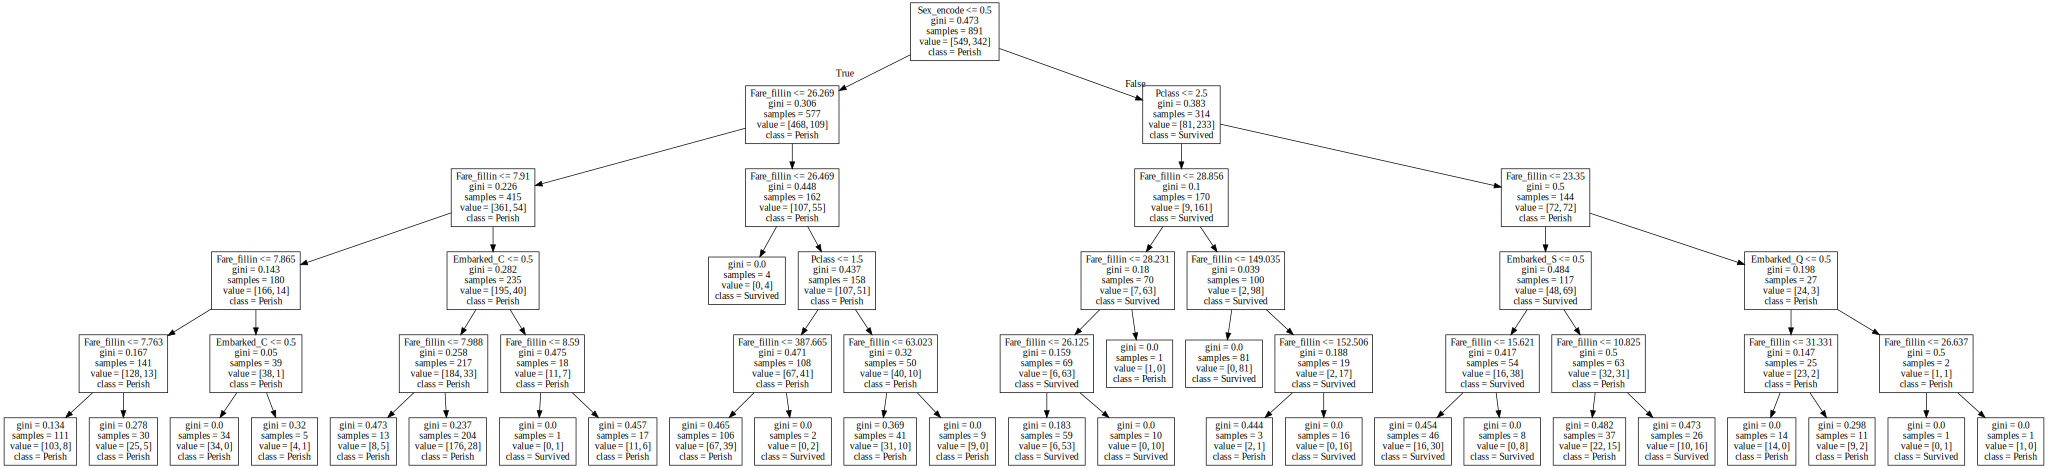

In [49]:
# graphviz 모듈을 가져옵니다.
import graphviz

# scikit-learn(줄여서 sklearn)의 tree 모듈에서 Decision Tree를 시각화 할 수 있는 export_graphviz를 가져옵니다.
from sklearn.tree import export_graphviz

# export_graphviz로 Decision Tree를 시각화합니다. 시각화 할 때는 다음의 옵션이 들어갑니다.
# 1) model. 시각화할 트리(Decision Tree) 입니다.
# 2) feature_names. 트리를 만들 때 사용한 feature들의 이름입니다.
# 3) class_names. 살았을 경우 시각화에서 어떻게 표현할 것인지(Survived), 반대로 죽었을 경우 시각화에서 어떻게 표현할 것인지(Perish)를 알려줍니다.
# 4) out_file. 시각화 겨롸를 저장할 파일명입니다. 이번에는 파일로 저장하지 않고 바로 쥬피터 노트북에 띄울 생각이므로 None을 주면 됩니다.
# 마지막으로 시각화한 결과를 dot_tree라는 이름의 변수에 저장합니다.
dot_tree = export_graphviz(model,
                           feature_names=feature_names,
                           class_names=["Perish", "Survived"],
                           out_file=None)

# graphviz에서 Source라는 기능을 통해 Decision Tree를 시각화합니다.
graphviz.Source(dot_tree)

In [50]:
# fit이 끝났으면, predict라는 기능을 사용하여 생존 여부(Survived)를 예측합니다.
# predict의 실행이 끝나면 test 데이터의 생존 여부(Survived)를 반환하며, 이를 predictions라는 이름의 변수에 할당합니다.
predictions = model.predict(X_test)

# predictions 변수에 할당된 데이터의 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시되나, column이 없기 때문에 (row,) 형태로 표시될 것입니다.
print(predictions.shape)

# predictions 변수에 값이 너무 많기 때문에, 상위 10개만 출력합니다.
predictions[0:10]

(418,)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

### submission

In [53]:
from  sklearn.metrics import accuracy_score
# 캐글이 제공하는 제출 포멧(gender_submission.csv)을 읽어옵니다.
# PassengerId는 test 데이터와 동일하며, Survived는 남자일 경우 0, 여자는 1이 들어가 있습니다.
# 이를 submission 이라는 이름의 변수에 할당합니다.
submission = pd.read_csv("titanic/gender_submission.csv", index_col="PassengerId")
print('결정 트리, 정확도 : {:.2f}%'.format(accuracy_score( predictions, submission["Survived"])*100))
# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# submission 데이터의 상위 5개를 띄웁니다.
submission.head()

결정 트리, 정확도 : 94.02%
(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [54]:
# 제출 포멧(submission)의 생존 여부(Survived) 컬럼에 우리의 예측값(predictions)를 집어넣습니다.
# 두 데이터 모두 길이가 418개로 동일하기 때문에, 등호(=)를 통해 쉽게 예측값을 넣을 수 있습니다.
submission["Survived2"] = predictions

# submission 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
print(submission.shape)

# 
sum(submission["Survived"] ==submission["Survived2"] )

(418, 2)


393

In [55]:
393/418*100

94.01913875598086

In [56]:
submission["Survived"] = submission["Survived2"] 
submission.drop("Survived2", axis=1, inplace=True)

In [57]:
submission.head(3)

,Survived
PassengerId,
892,0
893,0
894,0


In [59]:
# 마지막으로 submission 변수에 들어간 값을 csv 형식의 데이터로 저장합니다.
submission.to_csv("decision-tree.csv")

### 2. Confusion Matrix, 혼동 행렬
정확도로는 분류 모델의 평가가 충분하지 않을 수 있습니다. 예를 들어, 병이 있는 사람을 병이 없다고 판단하는 경우 Risk가 높기 때문에 모델의 목적에 맞게 분류 모델을 평가하여야 합니다. 이때 사용되는 것이 Confusion Matrix 입니다. 

<img src= '../img/Confusion_Matrix.png' alter='Confusion_Matrix' style="height: 200px"/> 

* Precision, 정밀도  : TP/(FP+TP), 1이라고 예측한 것 중 실제로 1인 것
* Sensitivity, 민감도 : True Positive rate = Recall = Hit ratio = TP/(TP+FN), 실제로 1인 것 중에 1이라고 예측한 것
* Specificity, 특이도 : True Negative rate = TN/(FP+TN), 실제로 0인 것 중에 0이라고 예측한 것 
* False Alarm, 오탐 : False Positive rate = 1-Specificity = FP/(FP+TN), 실제로 0인 것 중에 1이라고 예측한 것

### 3. ROC Curve, AUC
ROC Curve(Receiver-Operating Characteristic curve)는 민감도와 특이도가 서로 어떤 관계를 가지며 변하는지를 2차원 평면상에 표현한 것 입니다.<br>
ROC Curve가 그려지는 곡선을 의미하고, AUC(Area Under Curve)는 ROC Curve의 면적을 뜻합니다.<br>
AUC 값이 1에 가까울 수록 좋은 모델을 의미합니다. 

<img src= '../img/ROC_AUC.png' alter='ROC_AUC' style="height: 500px"/> 

In [ ]:
############## 타이타닉 데이터경진데이터의 실제답을 모른다.....

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

print('결정 트리, 정확도 : {:.2f}%'.format(accuracy_score( predictions, submission["Survived"])*100))
print('정밀도 Precision : {:.3f}'.format(precision_score(predictions, submission["Survived"])*100))
print('민감도 Recall : {:.3f}'.format(recall_score(predictions, submission["Survived"])*100))
print('AUC : {:.3f}'.format(roc_auc_score(predictions,submission["Survived"])*100))

# * Precision, 정밀도  : TP/(FP+TP), 1이라고 예측한 것 중 실제로 1인 것(정답과 예측레이블 데이터중에서 정답인것의 비율 )
# * Sensitivity, 민감도 : True Positive rate = Recall = Hit ratio = TP/(TP+FN), 실제로 1인 것 중에 1이라고 예측한 것
#                      실제로 사기인데 사기라고 예측 , 사망을 사망으로 예측 
# * Specificity, 특이도 : True Negative rate = TN/(FP+TN), 실제로 0인 것 중에 0이라고 예측한 것 
#                      실제로 정상인데 정상이라고 예측 
# * False Alarm, 오탐 : False Positive rate = 1-Specificity = FP/(FP+TN), 실제로 0인 것 중에 1이라고 예측한 것
#f1-score:정답률과 재현률의 조화평균, support:정답레이블의 데이터수
#recall:재현율 (실제 정답인 것중에서 정답인 것과 예측인 것의 비율을 나타낸다. )


결정 트리, 정확도 : 100.00%
정밀도 Precision : 100.000
민감도 Recall : 100.000
AUC : 100.000


In [38]:
from sklearn.metrics import classification_report
print(classification_report(predictions, submission["Survived"]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       127

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418



In [39]:
################### category data분석의 정확도 측정

from sklearn.metrics import accuracy_score

actual = ["신발", "가방", "코트"]
predict = ["신발", "가방2", "코트"]
accuracy_score(actual, predict)

0.6666666666666666

In [60]:
################### 연속 data분석의 정확도 측정

from sklearn.metrics import mean_squared_error

actual = [1000, 2000,3000,4000]
predict = [900, 2000, 3100, 4100]

mean_squared_error(actual, predict)

7500.0

In [61]:
(100**2 + 100**2 + 100**2)/4

7500.0